# Funciones de distribución de probabilidad

## Distribución uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [23]:
a = 1
b = 100
n = 1000000

data = np.random.uniform(a, b, n)

<Axes: ylabel='Count'>

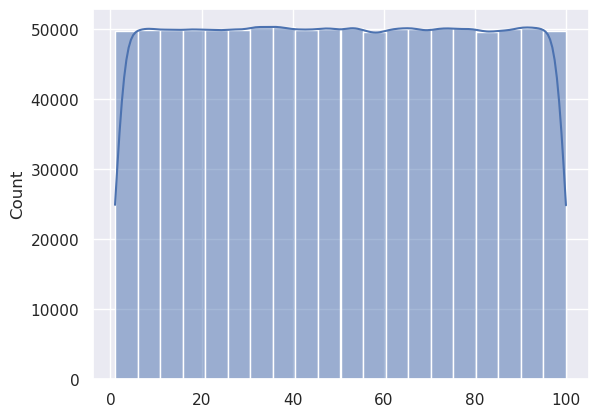

In [24]:
sns.histplot(data, bins=20, kde=True)

## Distribución normal

In [48]:
data = np.random.normal(size=1000000)

<Axes: >

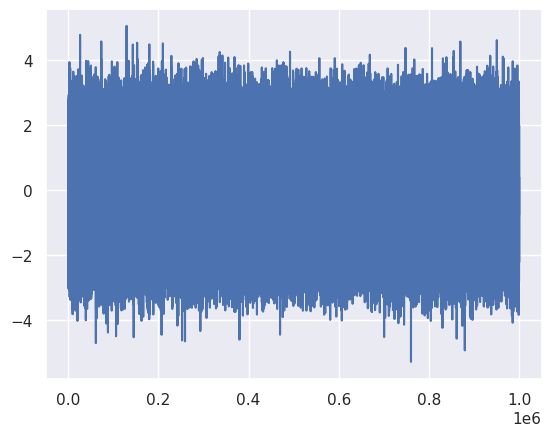

In [49]:
x = range(1, 1000001)
sns.set_theme()
sns.lineplot(x=x, y=data)


<Axes: ylabel='Count'>

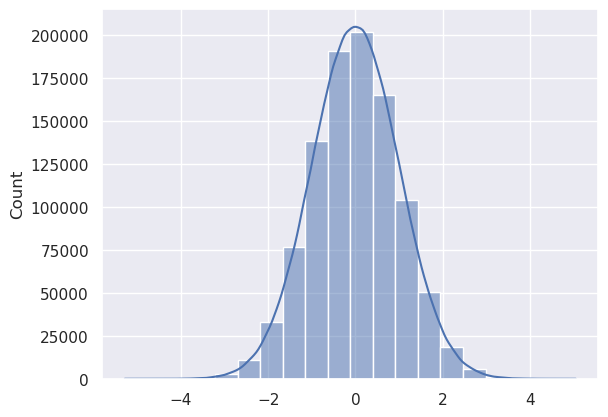

In [50]:
sns.histplot(data, bins=20, kde=True)

<Axes: >

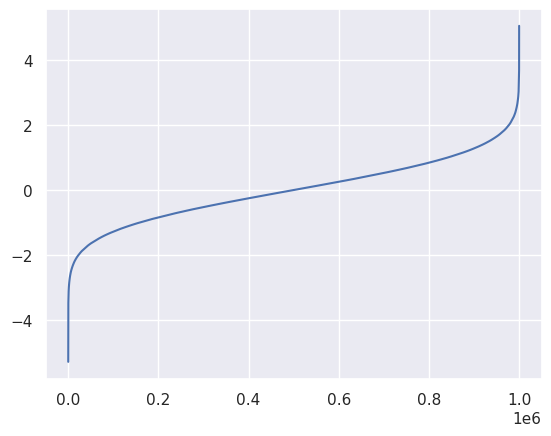

In [51]:
data2 = data.copy()
data2.sort()
sns.lineplot(x=x, y=data2)

In [53]:
mu, sd = 5.5, 2.5
s = np.random.normal(mu, sd, 1000000)

<Axes: ylabel='Count'>

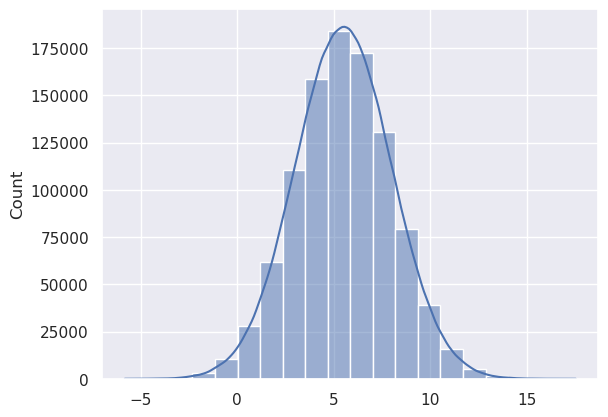

In [54]:
sns.histplot(s, bins=20, kde=True)

# Simulación de Monte Carlo

3.1414102399999995


<Axes: >

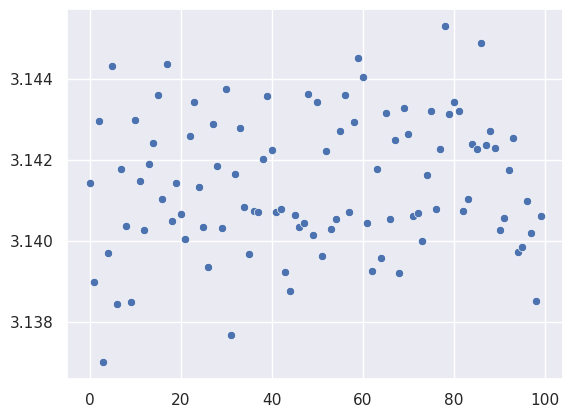

In [3]:
pi_avg = 0
n = 1000000
pi_value_list = []
for i in range(100):
    value = 0
    x = np.random.uniform(0, 1, n).tolist()
    y = np.random.uniform(0, 1, n).tolist()
    for j in range(n):
        z = np.sqrt(x[j] * x[j] + y[j] * y[j])
        if z <= 1:
            value += 1
    float_value = float(value)
    pi_value = float_value * 4 / n
    pi_value_list.append(pi_value)
    pi_avg += pi_value

pi = pi_avg / 100
print(pi)
sns.set_theme()
sns.scatterplot(pi_value_list)

In [10]:
def pi_monte_carlo(n, n_exp, seed=None):
    if seed is not None:
        np.random.seed(seed)
    pi_avg = 0
    pi_value_list = []
    for _ in range(n_exp):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp
    fig = sns.scatterplot(data=pi_value_list)
    return pi, fig

3.1412014000000004


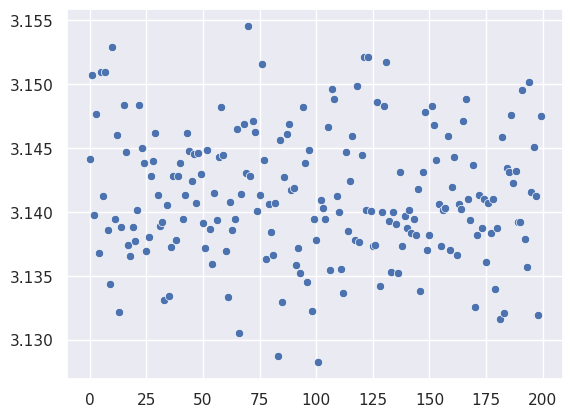

In [13]:
pi, fig = pi_monte_carlo(100000, 200, 1234)
print(pi)
plt.show(fig)